In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data_dir = "C:\\Users\\dongh\\Downloads\\MBD project\\"

In [29]:
listc = ["Time","Alberta","British Columbia","Manitoba","Nova Scotia","Ontario","Quebec"]
lista = ["California","Colorado","Florida","Georgia","Hawaii","Illinois","Massachusetts"
         ,"Michigan","North Carolina","New Jersey","Nevada","New York","Texas","Virginia","Washington"]

In [30]:
us = pd.read_csv(data_dir + "US-bystate.csv")
us.columns.values[0] = "Index"
us = us.set_index("Index")
us = us.transpose()
us = us.reset_index()
Others = pd.read_csv(data_dir + "Others.csv")
impact = pd.read_csv(data_dir + "irport_traffic.csv")
canada = Others.loc[:,listc]

In [31]:
list = us.columns.values
list[0] = "Time"
us.columns = list
us.head()

,Time,New York,California,Florida,Hawaii,Nevada,Massachusetts,Texas,Illinois,New Jersey,Washington,Georgia,Virginia,Colorado,North Carolina,Michigan
0,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/26/2020,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/27/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
canada.head()

,Time,Alberta,British Columbia,Manitoba,Nova Scotia,Ontario,Quebec
0,1/23/2020,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0
3,1/26/2020,0,0,0,0,1,0
4,1/27/2020,0,0,0,0,0,0


In [33]:
impact.head()

,Date,PercentOfBaseline,State
0,3/16/2020,92,New South Wales
1,3/16/2020,96,Santiago Province
2,3/16/2020,100,Alberta
3,3/16/2020,63,Alberta
4,3/16/2020,100,British Columbia


In [34]:
cali_inf = canada.loc[:,["Time","British Columbia"]]
cali_inf = cali_inf.reset_index()
cali_inf = cali_inf.drop("index",axis=1)
cali_inf.head()

,Time,British Columbia
0,1/23/2020,0
1,1/24/2020,0
2,1/25/2020,0
3,1/26/2020,0
4,1/27/2020,0


In [35]:
cali_imp = impact.loc[impact.State == "British Columbia",:]
cali_imp = cali_imp.reset_index()
cali_imp = cali_imp.drop("index",axis=1)
cali_imp.head()

,Date,PercentOfBaseline,State
0,3/16/2020,100,British Columbia
1,3/17/2020,93,British Columbia
2,3/18/2020,97,British Columbia
3,3/19/2020,92,British Columbia
4,3/20/2020,94,British Columbia


In [36]:
index1 = cali_inf["Time"].values.tolist()
index1 = index1.index("3/16/2020")
index2 = cali_inf["Time"].values.tolist()
index2 = index2.index("10/17/2020")
cali_inf = cali_inf.iloc[index1:index2,:]
cali_inf.shape

(215, 2)

In [37]:
cali_imp = cali_imp.drop("State",axis=1)
cali_imp.head()

,Date,PercentOfBaseline
0,3/16/2020,100
1,3/17/2020,93
2,3/18/2020,97
3,3/19/2020,92
4,3/20/2020,94


In [38]:
cali_imp = cali_imp.groupby("Date").mean()
cali_imp = cali_imp.reset_index()
cali_imp

,Date,PercentOfBaseline
0,10/1/2020,93
1,10/10/2020,72
2,10/11/2020,55
3,10/12/2020,21
4,10/13/2020,68
...,...,...
209,9/5/2020,75
210,9/6/2020,45
211,9/7/2020,20
212,9/8/2020,72


In [39]:
cali_inf.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\bc_inf.csv", index=False, header=True)
cali_imp.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\bc_imp.csv", index=False, header=True)

In [87]:
cali = pd.read_csv(data_dir + "bc.csv")
cali.head()

,Time,British Columbia,PercentOfBaseline
0,3/16/2020,30,100.0
1,3/17/2020,0,93.0
2,3/18/2020,83,97.0
3,3/19/2020,45,92.0
4,3/20/2020,40,94.0


In [88]:
N = 5
cali = cali.groupby(cali.index // N).mean()

In [89]:
cali = cali.reset_index()
cali["change"] = 0
for i in range(len(cali)):
    if i == 0:
        continue
    else:
        cali.iloc[i,3] = (cali.iloc[i,1] - cali.iloc[i-1,1])/cali.iloc[i-1,1]

In [90]:
cali = cali.iloc[1:,:]
cali.head()

,index,British Columbia,PercentOfBaseline,change
1,1,69.2,86.8,0.747475
2,2,70.6,77.2,0.020231
3,3,46.6,76.6,-0.339943
4,4,26.6,69.6,-0.429185
5,5,30.8,49.4,0.157895


In [91]:
N = 4
tmp1 = pd.DataFrame(cali.PercentOfBaseline[:20])
tmp1["change"] = cali.iloc[(N):(20+N),3].tolist()

In [92]:
cali = tmp1[:]
cali.head()

,PercentOfBaseline,change
1,86.8,0.157895
2,77.2,0.019481
3,76.6,0.312102
4,69.6,0.135922
5,49.4,-0.414530


In [93]:
cali.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\bc2.csv", index=False, header=True)

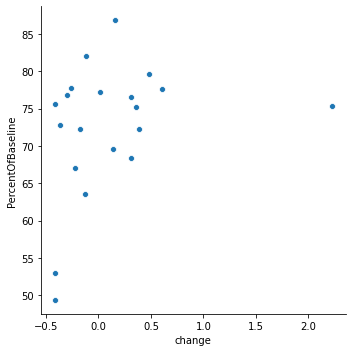

In [94]:
sns.relplot("change","PercentOfBaseline",data = tmp1)

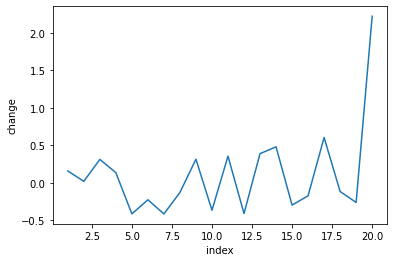

In [95]:
cali = cali.reset_index()
sns.lineplot("index","change",data = cali)

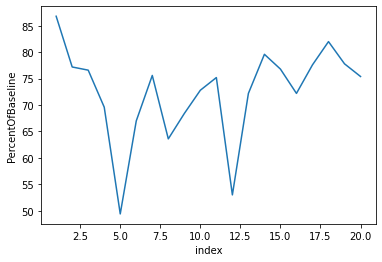

In [96]:
sns.lineplot("index","PercentOfBaseline",data = cali)

In [97]:
from statsmodels.api import OLS
OLS(cali.change,cali.PercentOfBaseline).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.048
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.9586
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                       0.340
Time:                        01:14:13   Log-Likelihood:                         -17.341
No. Observations:                  20   AIC:                                      36.68
Df Residuals:                      19   BIC:                                      37.68
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline     0.0018      0.002      0.979      0.340      -0.002       0.006
==============================================================================
Omnibus:                       27.932   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.921
Skew:                           2.331   Prob(JB):                     1.44e-11
Kurtosis:                       9.178   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""